# Advertisement Budget Prediction

## Objectives:
- Build Linear Regression model to predict the sales w.r.t a single & multiple features.
- Also evaluate the models & compare their respective scores like MAE, MSE, RMSE, R2.

## Steps included in this project:
1. Importing Libraries
2. Loading Data
3. Understanding Data
4. Visualization(Exploring Variables_Data Anylasis)
5. Data Preprocessing
6. Feature Selection
7. Preparing Data for Modelling
8. Applying different models

# 1. Importing Libraries

In [1]:
import os 
import numpy as np # linear algebra
import pandas as pd # data processing

# control and manage warnings
import warnings
warnings.filterwarnings('ignore')

# Data visualization setup
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid") # Set the style of seaborn

# 2. Loading Data

In [2]:
# Load the dataset 

ad = pd.read_csv("advertising.csv")
ad.head() #Display the 1st five rows of the DataFrame to inspect the data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 3. Understanding Data

In [3]:
ad.shape

(200, 4)

In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# Statistical description of numerical variables 
ad.describe() 

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# 4. Visualization(Exploring Variables_Data Anylasis)

In [6]:
corr = ad.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


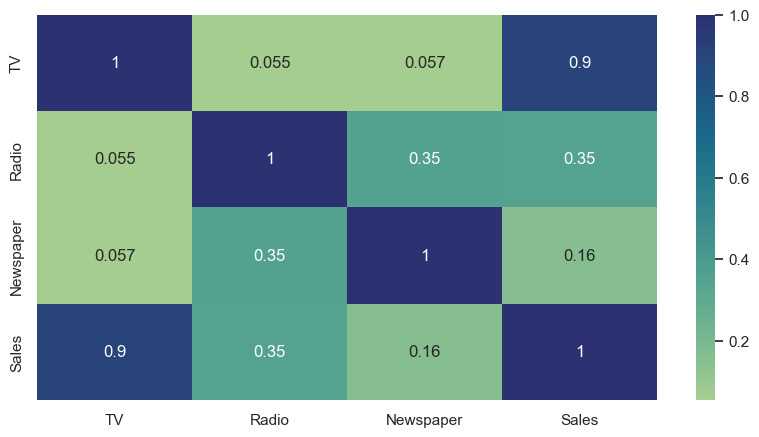

In [7]:
plt.figure(figsize = (10,5))
sns.heatmap(corr , annot = True, cmap = 'crest')
plt.show()

- we can observe that ‘Sales’ and ‘TV’ have a higher correlation as compared to others because it is giving 0.9 correlation.

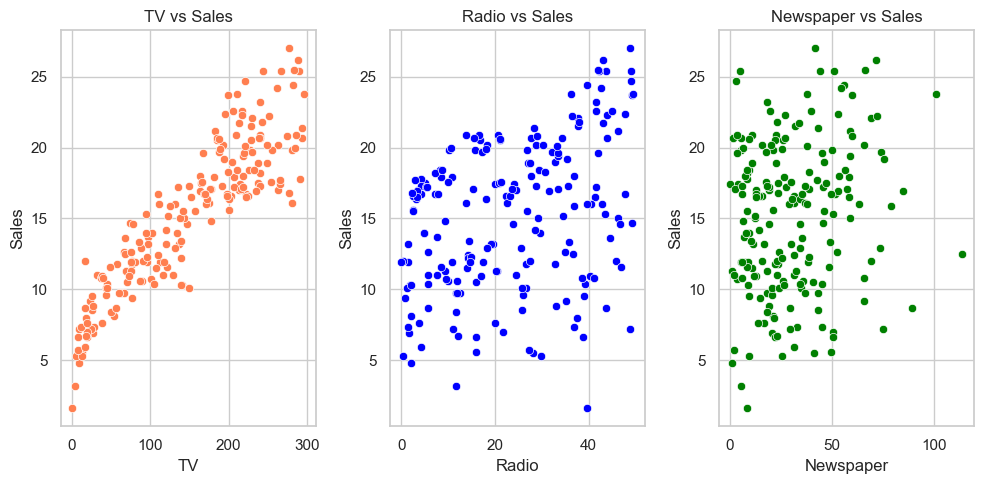

In [8]:
# Set up the subplots
plt.figure(figsize=(10,5))

# # Scatter plot for TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=ad, color='coral')
plt.title('TV vs Sales')

# Scatter plot for Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=ad, color='blue')
plt.title('Radio vs Sales')
           
# Scatter plot for Radio vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=ad, color='green')
plt.title('Newspaper vs Sales')

# Adjust layout
plt.tight_layout()
 
plt.show()

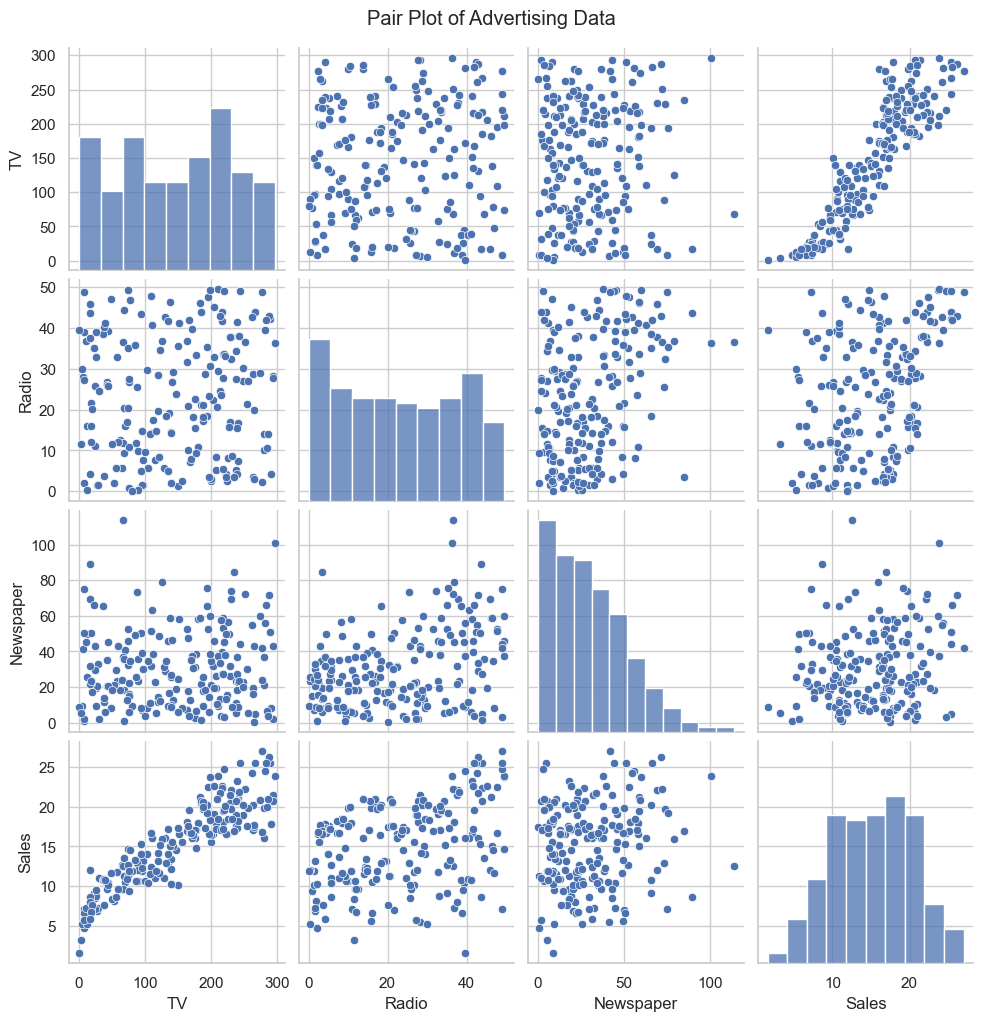

In [9]:
# Pair plot
sns.pairplot(ad)
plt.suptitle('Pair Plot of Advertising Data', y=1.02)
plt.show()

- 'Sales' is directly correlated with 'TV', little with 'Radio' but there is no correlation with 'Newspaper'.
- There is no correlation seems between all features.

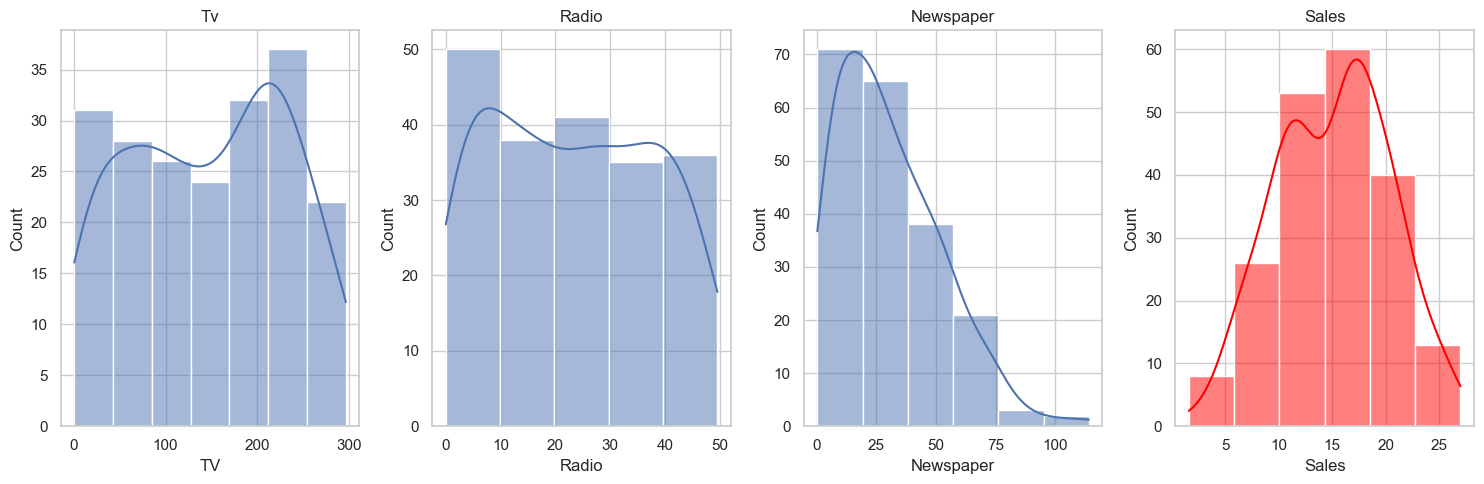

In [10]:
# Set up the subplots
plt.figure(figsize=(15, 5))

# Histogram for sepal_length
plt.subplot(1, 4, 1)
sns.histplot(x='TV', data=ad, bins=7, kde=True)
plt.title('Tv')

# Histogram for sepal_width
plt.subplot(1, 4, 2)
sns.histplot(x='Radio', data=ad, bins=5, kde=True)
plt.title('Radio')

# Histogram for petal_length
plt.subplot(1, 4, 3)
sns.histplot(x='Newspaper', data=ad, bins=6, kde=True, )
plt.title('Newspaper')

# Histogram for petal_width
plt.subplot(1, 4, 4)
sns.histplot(x='Sales', data=ad, bins=6, kde=True, color='red')
plt.title('Sales')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Spending budget for advertisments on TV is in all range, same for Radio but less than TV. But on newspapers, less budget is spend

# 5) Data Preprocessing
### (I) Missing value treatment

In [11]:
## Checking Missing values
ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

- No missing values

### (II) Encoding part


In [12]:
# Check data types of all columns
ad.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

-  All variables are already numeric, encoding might not be necessary.

### (III) Handling Outlier

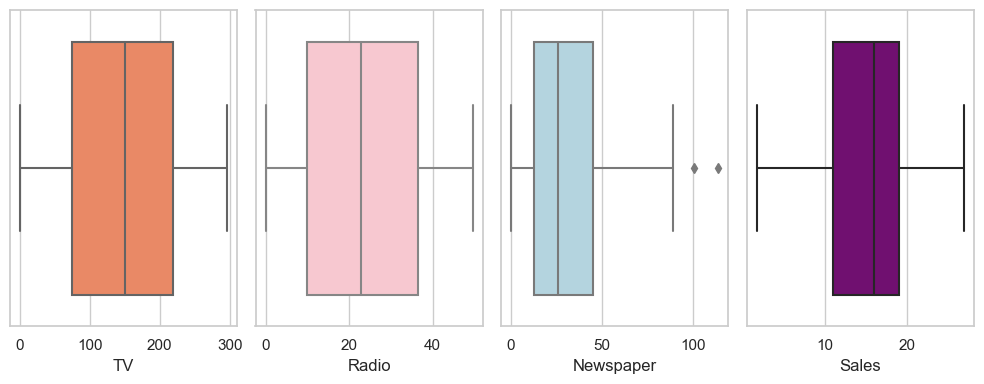

In [13]:
# Set up the subplots
plt.figure(figsize=(10,4))

# # Box plot for TV 
plt.subplot(1, 4, 1)
sns.boxplot(x=ad['TV'], color='coral')

# Box plot for Radio 
plt.subplot(1, 4, 2)
sns.boxplot(x=ad['Radio'], color='pink')

           
# Box plot for Newspaper
plt.subplot(1, 4, 3)
sns.boxplot(x=ad['Newspaper'], color='lightblue')

# Box plot foe Sales
plt.subplot(1, 4, 4)
sns.boxplot(x=ad['Sales'], color='purple')

# Adjust layout
plt.tight_layout()
 
plt.show()

In [14]:
ns_q1 = ad['Newspaper'].quantile(0.25)
ns_q3 = ad['Newspaper'].quantile(0.75)
ns_iqr =   ns_q3 - ns_q1
ns_upper = ns_q3 + 1.5 * ns_iqr
ns_lower = ns_q1 - 1.5 * ns_iqr

ad['Newspaper'] = np.where(ad['Newspaper'] > ns_upper,ns_upper,
                  np.where(ad['Newspaper'] < ns_lower,ns_lower,
                           ad['Newspaper']) )

<Axes: xlabel='Newspaper'>

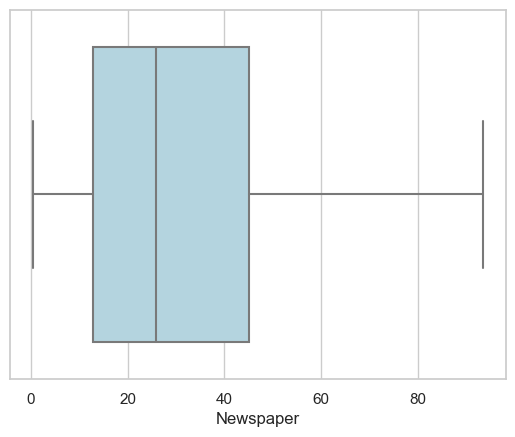

In [15]:
# Box plot for Newspaper
sns.boxplot(x=ad['Newspaper'], color='lightblue')

# 6) Feature Selection

In [16]:
# Split the dataset into features (X) and target variable (y)
x = ad.drop('Sales', axis=1)
y = ad['Sales']

# 7) Preparing Data for Modelling

In [17]:
# Split the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160,) (40,)


# 8) Applying Model

In [18]:
from sklearn.linear_model import LinearRegression 

LR = LinearRegression()
LR.fit(x_train, y_train)

# predict model
y_pred_train_LR = LR.predict(x_train)
y_pred_test_LR = LR.predict(x_test)

In [19]:
# checking model performance by using various evaluation metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_MAE = mean_absolute_error(y_test, y_pred_test_LR)
linear_MSE = mean_squared_error(y_test, y_pred_test_LR)
linear_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test_LR)) # root mean sqaured error
linear_R2 = r2_score(y_test, y_pred_test_LR)
linear_Accuracy = LR.score(x_test,y_test)

print('Mean absolute error for linear regression :', linear_MAE)
print('Mean squared error for linear regression :', linear_MSE)
print('Root Mean Squared error for linear regression :', linear_RMSE)
print("R-squared for linear regression :", linear_R2)
print('Accuracy for linear regression :', linear_Accuracy*100)

Mean absolute error for linear regression : 1.2734539408692913
Mean squared error for linear regression : 2.9107414282712516
Root Mean Squared error for linear regression : 1.7060895135576126
R-squared for linear regression : 0.9058046015102617
Accuracy for linear regression : 90.58046015102616
